<a href="https://colab.research.google.com/github/MalikHasnat1999/ZTM_Tensorflow/blob/master/03_Computer_Vision_%26_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Computer vision is the practice of discovering patterns in visual data. Such as the camera of self driving car recognizing the car in front


# Import the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [ ]:
import zipfile

# unzip the file
unzip = zipfile.ZipFile("pizza_steak.zip")
unzip.extractall()
unzip.close()

# 104.Inspect the data

A very crucial step at the beginning of every machine learning problem is to becomme one with the data..

and for computer vision project.. that usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

# Walk throught pizza_steak directory and list numner of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}' ")

There are 2 directories and 1 image in 'pizza_steak' 
There are 2 directories and 1 image in 'pizza_steak/test' 
There are 0 directories and 250 image in 'pizza_steak/test/pizza' 
There are 0 directories and 250 image in 'pizza_steak/test/steak' 
There are 2 directories and 1 image in 'pizza_steak/train' 
There are 0 directories and 750 image in 'pizza_steak/train/pizza' 
There are 0 directories and 750 image in 'pizza_steak/train/steak' 


In [ ]:
# Another way to find number of images in a directory
pizza_images =  len(os.listdir("pizza_steak/train/pizza"))
pizza_images

750

## class_name

In [ ]:
! rm -rf pizza_steak/train/.DS_Store

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train") # make path object
class_name = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_name = class_name[0:]
print(class_name)

[['pizza' 'steak']]


## plot_random_image()

In [ ]:
import random
import pathlib
import matplotlib.pyplot as plt


def plot_random_image_2(target_dir, target_class):

  # get the directory
  target_folder = target_dir + target_class

  # get random image 
  random_image = random.sample(os.listdir(target_folder), 1)


  # read in the path and print random image
  img = plt.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print("image shape:",img.shape)

  return img

In [ ]:
img = plot_random_image_2("pizza_steak/train/",
                    "pizza")

Normalizing our Data

In [ ]:
img.min(), img.max()

(0, 255)

In [ ]:
img / 255

array([[[0.        , 0.03137255, 0.10588235],
        [0.        , 0.03137255, 0.11372549],
        [0.00392157, 0.03529412, 0.1254902 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.03137255, 0.10588235],
        [0.        , 0.03137255, 0.11372549],
        [0.00392157, 0.03529412, 0.1254902 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.02745098, 0.10196078],
        [0.        , 0.03137255, 0.11372549],
        [0.        , 0.03137255, 0.12156863],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

# 107.An End-to-End example

Let's build a CNN to to find patterns in our images, more specifically we need to:

* Load our images
* Preprocess our images
* Build a CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set randomm seed
tf.random.set_seed(42)

# preprocess data (Normalize)
train_datagen = ImageDataGenerator(rescale = 1./255)
validate_datagen = ImageDataGenerator(rescale = 1./255)

# import data from directories and turn it in batches
train_data = train_datagen.flow_from_directory(directory="pizza_steak/train",
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
validate_data = validate_datagen.flow_from_directory(directory="pizza_steak/test", 
                                                     batch_size=32,
                                                     target_size=(224,224),
                                                     class_mode="binary",
                                                     seed=42)

# Build a CNN model (same as tiny VGG on CNN explainer website)
model_1 = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation="relu",
                             input_shape=(224,224,3)),
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation="relu"),
      tf.keras.layers.MaxPool2D(pool_size=2,
                                padding="valid"),
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation="relu"),
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3,
                             activation="relu"),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation="sigmoid")

])

# compile the model
model_1.compile(
     loss = tf.keras.losses.BinaryCrossentropy(),
     optimizer = tf.keras.optimizers.Adam(),
     metrics = ["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = validate_data,
                        validation_steps = len(validate_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 219ms/step - loss: 0.6208 - accuracy: 0.6447 - val_loss: 0.5229 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.4602 - accuracy: 0.7880 - val_loss: 0.4049 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4063 - accuracy: 0.8093 - val_loss: 0.3375 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3907 - accuracy: 0.8380 - val_loss: 0.3358 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3522 - accuracy: 0.8547 - val_loss: 0.3184 - val_accuracy: 0.8520


# 109.Non-CNN model

In [ ]:
# set seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid"),
])

# compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data = validate_data,
            validation_steps = len(validate_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 0.7096 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


## Improving our model





In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(224,224,3)),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid"),
])


# compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validate_data,
            validation_steps=len(validate_data))

Epoch 1/5
47/47 [==============================] - 10s 200ms/step - loss: 4.3020 - accuracy: 0.6200 - val_loss: 2.3631 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.8585 - accuracy: 0.7060 - val_loss: 0.7710 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.5936 - accuracy: 0.7353 - val_loss: 0.5341 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6399 - accuracy: 0.7607 - val_loss: 0.6195 - val_accuracy: 0.6940
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.5812 - accuracy: 0.7487 - val_loss: 0.5540 - val_accuracy: 0.7780


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Difference in Trainable params in  CNN and non-CNN is 15M,  30K

You can think of trainable parameters as **Patterns a model can learn from**. Intuitively, you might think that more is better. In some cases yes it is. But in this case the difference here is the two differennt styles of model that we are using. where a series of different learnable patterns connected to each other and hence a higher number of possible learnable parameters,**, a convolutional neural netwerk CNN seek to sort and learn the most important patterens in a image**. So even there are less learnable parameters in our CNN, these are often more helpful in dechipering between differet **features** in an image.

# 111.Binary Classificaion: Breaking Down CNN model

* Visualize the data
* Preprocess the data
* Create a model (start with the baseline)
* Fit the model
* Evaluate the model
* Improve the model
* Repeat, until satisfied (Experiment)

## i).Visualize the data

image shape: (384, 512, 3)
image shape: (512, 512, 3)


array([[[251, 255, 231],
        [251, 255, 233],
        [247, 252, 230],
        ...,
        [114,  45,   3],
        [112,  44,   0],
        [120,  54,   6]],

       [[242, 248, 220],
        [246, 255, 228],
        [247, 255, 232],
        ...,
        [116,  47,   6],
        [109,  42,   0],
        [114,  47,   2]],

       [[238, 247, 216],
        [247, 255, 227],
        [246, 254, 230],
        ...,
        [117,  48,   7],
        [109,  42,   0],
        [107,  43,   0]],

       ...,

       [[ 49,  26,   8],
        [ 47,  24,   6],
        [ 47,  21,   4],
        ...,
        [114,  64,   1],
        [121,  69,   9],
        [132,  80,  20]],

       [[ 46,  25,   4],
        [ 45,  23,   2],
        [ 45,  23,   2],
        ...,
        [117,  66,   3],
        [125,  74,  11],
        [137,  86,  23]],

       [[ 39,  19,   0],
        [ 40,  19,   0],
        [ 45,  23,   2],
        ...,
        [117,  66,   3],
        [126,  75,  12],
        [135,  84,  21]]

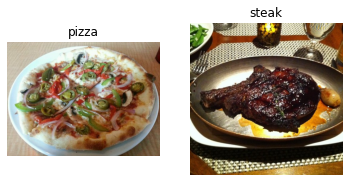

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plot_random_image_2("pizza_steak/train/", "pizza")
plt.subplot(1,2,2)
plot_random_image_2("pizza_steak/train/", "steak")


##ii).Preprocess the data

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather then look at all the images at once, a model might only look at 32 at a time.
it does this for couples of reasons.
1. 10,000 images might not fit in the memory of your processor (GPU).
2. Trying to learn patterns in 10,000 images in one hit could result in model not being able to learn very much.

Why 32?

[cause its good for your health...](https://twitter.com/ylecun/status/989610208497360896?s=20)

In [ ]:
# create train and test DataGenerators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our data from the directories and turn them in tensors
train_data = train_data_gen.flow_from_directory(directory="pizza_steak/train",
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode="binary")

test_data = test_data_gen.flow_from_directory(directory="pizza_steak/test",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of train data
images, labels = train_data.next() # get the next batch of "images/labels" 
len(images), len(labels)

(32, 32)

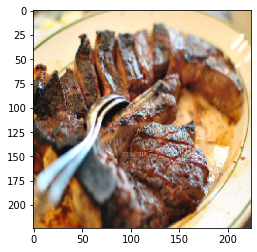

In [ ]:
plt.imshow(images[0])

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## iii).Create a model (start with a baseline)

A baseline is relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then increase complexity as requried (e.g look at which current model is perfroming best for your model)

In [ ]:
# make creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten
from tensorflow.keras import Sequential
import tensorflow as tf

In [ ]:
# set random seed
tf.random.set_seed(42)

# create the model
model_4 = Sequential([
        Conv2D(filters=10,    # filter is the number of sliding window going across as input
               kernel_size=(3,3), # the size of sliding window going across as input
               strides=(1, 1), # the step size sliding window takes across an input
               padding="valid", # if 'same', output shape is same as input shape, if 'valid' output shape gets compressed
               activation="relu",  
               input_shape=(224, 224, 3)), # input layer
        Conv2D(10, 3, activation="relu"),
        Conv2D(10, 3, activation="relu"),
        Flatten(),
        Dense(1, activation="sigmoid") # output layer
])


In [ ]:
# Compile the model
model_4.compile(
    loss=["binary_crossentropy"],
    optimizer = Adam(),
    metrics=["accuracy"]
)

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## iv).Fit the model

In [ ]:
# Total no of batches
len(train_data), len(test_data)

(47, 16)

In [ ]:
# fit the model
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data), # need to take 47 steps per epoch
            validation_data=test_data,
            validation_steps=len(test_data)  # need to take 16 steps per validation set
)

Epoch 1/5
47/47 [==============================] - 10s 205ms/step - loss: 0.8801 - accuracy: 0.5353 - val_loss: 0.6675 - val_accuracy: 0.5760
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6397 - accuracy: 0.6473 - val_loss: 0.5452 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4621 - accuracy: 0.8007 - val_loss: 0.4304 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3545 - accuracy: 0.8580 - val_loss: 0.3766 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.2656 - accuracy: 0.9000 - val_loss: 0.3697 - val_accuracy: 0.8340


## v).Evaluate the data

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.3697 - accuracy: 0.8340


[0.36971718072891235, 0.8339999914169312]

Text(0, 0.5, 'Loss')

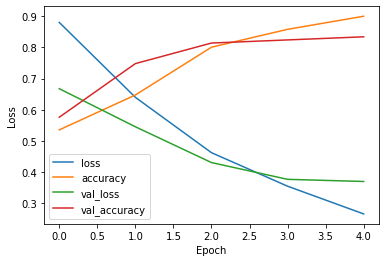

In [ ]:
# loss curve and training curve
import pandas as pd

pd.DataFrame(history_4.history).plot()
plt.xlabel("Epoch")
plt.ylabel("Loss")

When a models **validation loss starts to increase**, its likely that model is **overfitting** the training datasets, This means it is learning the patterns in the training dataset *too well* and thus model ability ot genneralize the unseen data becomes diminished

> **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differece your model may be overfitting




## vi).Adjust the model performance

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* increase number of conv layers
* increase number of conv filters
* add another dense layer to the output of our flattened layer

Ways to Reduce overfitting:

* add data augmentation
* add data regularization layer (such as MaxPool2D)
* add more data...

> **Note:**Reducing overfitting is also known as regularization

In [ ]:
# create the model (new baseline)
model_5 = Sequential([
        Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
        MaxPool2D(pool_size=2), # condense the features
        Conv2D(10, 3, activation="relu"),
        MaxPool2D(),
        Conv2D(10, 3, activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5, 
                        steps_per_epoch  q  =len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

SyntaxError: ignored

In [ ]:
# Loss curve
pd.DataFrame(history_5.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
model_4.summary(), model_5.summary()

There is quite a difference in Trainable parameters between both models

> **Question:** What is Data Augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterens.
Altering might mean adjusting the rotation of the image, flipping it, rotating it or something else.


Let's visualize the data augmentation.

In [ ]:
# create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,  # rescaling factor: Defaults is None. If None or 0, no rescaling is applied,otherwise we multiply the data by the value provided(after applying all other transformations).
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move the image on x-axis
                                             height_shift_range=0.3, # move the image on y-axis
                                             horizontal_flip=True)

# Without Augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# import data from the directory and augment it
tf.random.set_seed(42)

print("Train Augmented Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory="pizza_steak/train",
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode="binary",
                                                         shuffle=False) # for Demonstration only

# import non-augmented data 
print("Train Data non-augmented")
train_data = train_datagen.flow_from_directory(directory="pizza_steak/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("Test Data non-augmented")
test_data = test_datagen.flow_from_directory(directory="pizza_steak/test",
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

> **Note:** Data Augmentation is usually performed on the training dataset. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model

In [ ]:
# get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented

In [ ]:
len(images), len(augmented_images)

In [ ]:
# show original images and augmented images
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(7,8))
random_index = random.choice(range(32))
plt.subplot(1,2,1)
plt.imshow(images[random_index])
plt.title("Original 8")
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(augmented_images[random_index])
plt.title("Augmented Image")
plt.axis(False)

Now that we have seen what augmented image is lets build a model with *trian_data_augmented*

In [ ]:
import tensorflow as tf

# set random seed
tf.random.set_seed(42)

# create the model
model_6 = Sequential([
          Conv2D(10, 3, activation="relu"),
          MaxPool2D(pool_size=2),
          Conv2D(10, 3, activation="relu"),
          MaxPool2D(2),
          Conv2D(10, 3, activation="relu"),
          MaxPool2D(2),
          Flatten(),
          Dense(1, activation="sigmoid")

])

# compile the model
model_6.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
import pandas as pd
pd.DataFrame(history_6.history).plot()

Let's shuffle our augmented data and see how our model do on it...

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory="pizza_steak/train",
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode="binary",
                                                    shuffle=True)

In [ ]:
# create same model as model_6
# set random seed
tf.random.set_seed(42)

# create the model
model_7 = Sequential([
          Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
          MaxPool2D(pool_size=2),
          Conv2D(10, 3, activation="relu"),
          MaxPool2D(),
          Conv2D(10, 3, activation="relu"),
          MaxPool2D(),
          Flatten(),
          Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
pd.DataFrame(history_7.history).plot()

>**Note:** When shuffling training data, the model gets exposed to all different kind of data during training, thus enabling it to learn features across wide array of images (in our case, pizza and steak at the same time instead of just pizza then steak)

## vii). Repeat until satisfied



Since we have already beaten our baseline, there are few things we could try to improve our model:

* Increase the number of layers (e.g Conv2D(), MaxPool2D())
* Increase the number of filters in each convolutional layer (e.g from 10 to 32 even 64)
* Train for longer
* Find an ideal learning rate
* Get more data
* Use **Transfer Learning** to leverage what another image model has learn and adjust it for our own use case


> **Practice:** Recreate CNN explainer model with Aumgented training Data

In [ ]:
# Set Random Seed
tf.random.set_seed(42)

# create the model
model_8 = Sequential([
              Conv2D(filters=10,
                     kernel_size=3,
                     strides=1,
                     padding="valid",
                     activation="relu",
                     input_shape=(224,224,3)),
              Conv2D(10, 3, activation="relu"),
              MaxPool2D(pool_size=2),
              Conv2D(10, 3, activation="relu"),
              Conv2D(10, 3, activation="relu"),
              MaxPool2D(),
              Flatten(),
              Dense(1, activation="sigmoid")         
])

# Compile the model
model_8.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)


# fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
pd.DataFrame(history_8.history).plot()

In [ ]:
model_8.evaluate(test_data)

# 124.Makeing predictions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = plt.imread("03-steak.jpeg")


In [ ]:
steak.shape

In [ ]:
plt.imshow(steak)
plt.axis(False)

## preprocessing our image

>**Note:** When you train a neural network and you want it to make prediction with it on your custom data. it is important that your custom data is preprocessed into same format as your model was trained on.

In [ ]:
# model_8.predict(steak)

# Gives the dimension Error
# ValueError: Input 0 of layer sequential_8 is incompatible with the layer:
# : expected min_ndim=4, found ndim=3. Full shape received: (32, 3024, 3)

## load_and_prepr_image()

In [ ]:
# Create a function to import an image and resize it to be able to used with your own model
# our model is expecting -> min_ndim=4
def load_and_prepr_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into tensor and
  reshape it to (img_shape, img_shape, color_channel)
  """

  # Read in our image
  img = tf.io.read_file(filename)
  # Decode the read image into tesnsor
  img = tf.image.decode_image(img) 
  # Resize the image
  img = tf.image.resize(img, size=(img_shape, img_shape))
  # Rescale the image (Normalize)
  img = img/255.
  # expand the dimension (Adding the batch dimension (1, 224, 224, 3))
  img = tf.expand_dims(img, axis=0)

  return img

In [ ]:
steak = load_and_prepr_image("03-steak.jpeg")
plt.imshow(steak[0])
plt.axis(False)
steak[0].shape

In [ ]:
pred = model_1.predict(steak[0])
pred

In [ ]:
class_name

In [ ]:
class_name[tf.cast(tf.round(pred), dtype=tf.int32)] 

# 127.Multi-class Image Classification

## i).Import and Become one with the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

In [ ]:
import zipfile

file = zipfile.ZipFile("10_food_classes_all_data.zip")
file.extractall()
file.close

In [ ]:
# walik throug all directories
import os

for dirpath , dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
# class name
import pathlib
import numpy as np

# Make path object
data_dir = pathlib.Path("10_food_classes_all_data/train/")
# get list of path name
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_name

In [ ]:
# visualize, visualize and visualize
import random 

img = plot_random_image_2("10_food_classes_all_data/train/",
                  random.choice(class_name))

## ii).Preprocess the Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in data from directores
train_data = train_datagen.flow_from_directory(directory="10_food_classes_all_data/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(directory="10_food_classes_all_data/test",
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

## iii).Create and Fit the Model




In [ ]:
# Import all libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.models import Sequential

In [ ]:
# (Baseline)
# set random seed
tf.random.set_seed(42)

# create the model
model_9 = Sequential([
              Conv2D(filters=10, 
                     kernel_size=3, 
                     input_shape=(224,224,3),
                     activation="relu"),
              Conv2D(10, 3, activation="relu"),
              MaxPool2D(pool_size=2),
              Conv2D(10, 3, activation="relu"),
              Conv2D(10, 3, activation="relu"),
              MaxPool2D(),
              Flatten(),
              Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics=["accuracy"]
)

# fit the model
history_9 = model_9.fit(train_data,
            epochs=5, 
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 509s 2s/step - loss: 2.1009 - accuracy: 0.2392 - val_loss: 2.0246 - val_accuracy: 0.2748
Epoch 2/5
235/235 [==============================] - 508s 2s/step - loss: 1.8766 - accuracy: 0.3485 - val_loss: 1.8811 - val_accuracy: 0.3428
Epoch 3/5
235/235 [==============================] - 502s 2s/step - loss: 1.6620 - accuracy: 0.4384 - val_loss: 1.8824 - val_accuracy: 0.3360
Epoch 4/5
235/235 [==============================] - 502s 2s/step - loss: 1.2560 - accuracy: 0.5793 - val_loss: 2.0381 - val_accuracy: 0.3396
Epoch 5/5
235/235 [==============================] - 501s 2s/step - loss: 0.7049 - accuracy: 0.7712 - val_loss: 2.5641 - val_accuracy: 0.3200


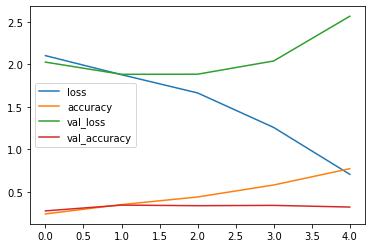

In [ ]:
# loss curve
import pandas as pd 

pd.DataFrame(history_9.history).plot()

Seems, like our model is overfitting....

## iv).Adjust the model hyperparameters

Reduce the overfitting

Due to performance on training data, its clear that our model is not learning...

So, lets try and fix overfitting by..
* **Get more data**(having more data gives a model more diversity to learn)
* **Simplify the model** - our current model is overfitting the data, it may be to complicated of model, one way to simplify the model is to: reduce # of layers, reduce # of hidden units
* **Use Data Augmentation** - data augmentation manipulates the training data in to add more diversity to it (withour altering the original image)
* **Use Transger Learning** - transfer learning leverages the patterns another model has learn on similar data to your own and allows you to use pattern on your own dataset

In [ ]:
model_9.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# how about we simplify the model
# Remove 2 Conlutional layer

# set random seed
tf.random.set_seed(42)

# create the model
model_10 = Sequential([
            Conv2D(10, 3, activation="relu"),
            Maxpool2D(),
            Conv2D(10, 3, activation="relu"),
            MaxPool2D(),
            Flatten(),
            Dense(10, activation="softmax")     
])

# compile the model
model_10.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoc=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 237s 1s/step - loss: 2.1110 - accuracy: 0.2431 - val_loss: 1.9661 - val_accuracy: 0.2916
Epoch 2/5
235/235 [==============================] - 236s 1s/step - loss: 1.8033 - accuracy: 0.3868 - val_loss: 1.8930 - val_accuracy: 0.3396
Epoch 3/5
235/235 [==============================] - 237s 1s/step - loss: 1.4729 - accuracy: 0.5120 - val_loss: 1.8699 - val_accuracy: 0.3528
Epoch 4/5
235/235 [==============================] - 239s 1s/step - loss: 1.0052 - accuracy: 0.6823 - val_loss: 2.0509 - val_accuracy: 0.3280
Epoch 5/5
235/235 [==============================] - 238s 1s/step - loss: 0.5747 - accuracy: 0.8331 - val_loss: 2.4354 - val_accuracy: 0.3268


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, None, None, 10)    280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 10)    0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 10)    910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, None, None, 10)    0         
_________________________________________________________________
flatten_1 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________